In [10]:
# Install Ultralytics YOLO
!pip install ultralytics

# Imports
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64



In [8]:
# Load pretrained YOLOv8 model
yolo = YOLO('yolov8s.pt')

Saving pexels-fauxels-3184398.jpg to pexels-fauxels-3184398 (1).jpg

image 1/1 /content/pexels-fauxels-3184398 (1).jpg: 416x640 7 persons, 1 tie, 422.0ms
Speed: 4.3ms preprocess, 422.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


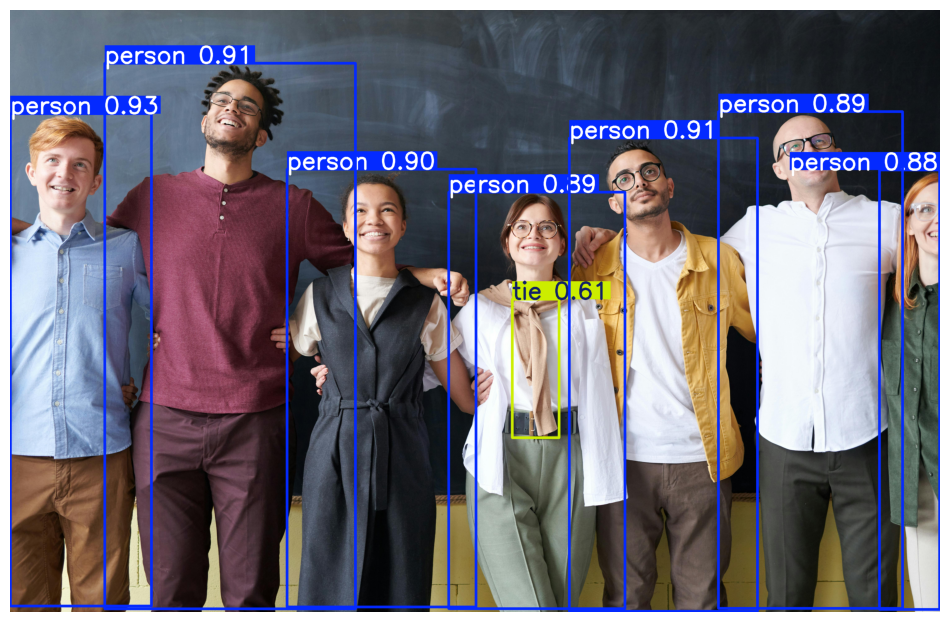

In [16]:


from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
import cv2


# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    # Run detection
    results = model(filename)

    # Get annotated image
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Show full image
    plt.figure(figsize=(12, 8))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.show()


In [17]:


from ultralytics import YOLO
from google.colab import files
import cv2


# Upload video
uploaded = files.upload()

for filename in uploaded.keys():
    # Run detection on video (output saved to runs/detect/predict)
    results = model(filename, save=True)

    print("✅ Detection complete! Processed video is saved in:", results[0].save_dir)


Saving WhatsApp Video 2025-08-13 at 12.21.33.mp4 to WhatsApp Video 2025-08-13 at 12.21.33.mp4

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/119) /content/WhatsApp Video 2025-08-13 at 12.21.33.mp4: 384x640 9 persons, 1 baseball bat, 413.9ms
video 1/1 (frame 2/119) /content/WhatsApp Video 2025-08-13 at 12.21.33.mp4: 384x640 9 persons, 1 baseball bat, 449.1ms
video 1/1 (frame 3/119) /content/WhatsApp Video 2025-08-13 at 12.21.33.mp4: 384x640 7 persons, 1 baseball bat, 439.2ms
video

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 5 persons, 5 chairs, 1 tv, 1 laptop, 1 cell phone, 505.2ms
Speed: 2.9ms preprocess, 505.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


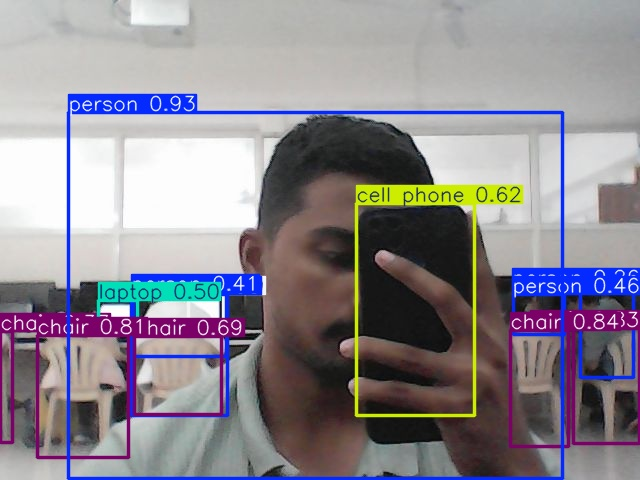

In [19]:
# JavaScript to capture webcam photo in Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture image from webcam
img_path = take_photo()

# Run YOLO object detection
results = yolo(img_path)
results[0].save('webcam_result.jpg')

# Display detected image in Colab
detected_img = cv2.imread('webcam_result.jpg')
cv2_imshow(detected_img)
